In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
market = pd.read_excel('ipc.xlsx', index_col=0)
market.columns = [x.replace(" MF Equity",'').replace(" INDEX",'') for x in market]
market

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC*,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA*,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,38.50,225.87,7.16,354.06,105.00,114.88,102.63,18.58,179.27,141.14,...,77.22,101.53,34.88,51.89,69.80,44.23,16.00,25.72,193.51,43657.48
2019-12-31,37.50,224.67,7.08,354.04,105.65,114.88,99.98,18.71,178.67,141.83,...,77.44,100.86,34.43,51.86,69.82,44.37,15.68,25.83,193.54,43541.02
2020-01-01,37.50,224.67,7.08,354.04,105.65,114.88,99.98,18.71,178.67,141.83,...,77.44,100.86,34.43,51.86,69.82,44.37,15.68,25.83,193.54,43541.02


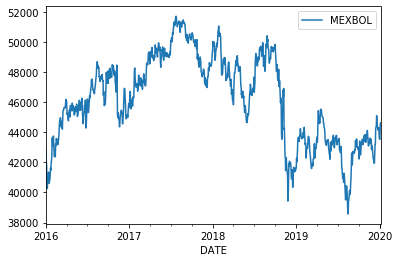

In [3]:
market[["MEXBOL"]].plot()

In [4]:
R = market[["MEXBOL"]].diff()
R = R.join(R.shift(1).rename({"MEXBOL": "MEXBOL_0"}, axis=1)).dropna()
R.head()

,MEXBOL,MEXBOL_0
DATE,,
2016-01-05,-72.02,-863.80
2016-01-06,-350.49,-72.02
2016-01-07,-1029.62,-350.49
2016-01-08,-396.20,-1029.62
2016-01-11,441.52,-396.20


In [5]:
Rmkt = market.pct_change().dropna()

Xall = Rmkt.drop("MEXBOL", axis=1)
Xall = Xall.join(Rmkt["MEXBOL"].shift(1)).dropna()

Xtrain = Xall.drop("MEXBOL", axis=1)
ytrain = Xall["MEXBOL"]

test_period = "2019-12"
Xtest, ytest = Xtrain[test_period:], ytrain[test_period:]
Xtrain, ytrain = Xtrain[:"2019-11":], ytrain[:"2019-11"]

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=1643)

In [44]:
from numpy.random import uniform
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_list = uniform(0.1, 1, 300)
params = {
    "alpha": alpha_list
}

# Inicializando el modelo
gcv = GridSearchCV(linear_model.Ridge(), params, scoring="r2")
gcv.fit(Xtrain, ytrain)

D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.18300156, 0.91732092, 0.91203503, 0.23051088, 0.34449243,
       0.73214238, 0.27857649, 0.70905029, 0.63854952, 0.19242107,
       0.954...
       0.56611158, 0.67561855, 0.80480232, 0.90258197, 0.9140341 ,
       0.32955486, 0.78507913, 0.15328462, 0.89068276, 0.24824209,
       0.65561159, 0.94032025, 0.88812225, 0.39176803, 0.83258995,
       0.90809135, 0.89977964, 0.21737969, 0.39627869, 0.80900741,
       0.88215967, 0.83153729, 0.33908233, 0.70609746, 0.90275043])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [10]:
gcv.best_params_

{'alpha': 0.19696521423681723}

In [115]:
gcv.predict(Xtest)[0]

-0.00017121553679820512

In [116]:
est = Xtest @ gcv.best_estimator_.coef_.reshape(-1, 1) + gcv.best_estimator_.intercept_

In [117]:
res = pd.Series(gcv.best_estimator_.coef_, Xtrain.columns)
res = res.reset_index().rename({"index": "asset", 0: "value"}, axis=1)

In [118]:
import plotly.express as px

In [119]:
px.bar(res, x="asset", y="value")

<h1 style="color:crimson">Tarea</h1>

* Entrenar un modelo Lasso con GridSearchCV usando un pipeline de polinomios de segundo grado
* Graficar coeficientes "significativos"
* Revisar cuantos parámetros son mayores a 1e-2

In [120]:
from numpy.random import uniform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from numpy.random import uniform


In [121]:
#linear de prueba
# paso 1: importar el modelo
from sklearn.linear_model import LinearRegression
# paso 2: inicializar el modelo (con sus hiperparámetros)
model = LinearRegression()
# paso 3: "entrenar" el modelo
model.fit(Xtrain, ytrain)
yhat = model.predict(Xtest)
r2_score(ytest, yhat)


-0.03910851656972292

In [123]:
#Ejerciios con otros Pipes#
pipe3 = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("model",LinearRegression(fit_intercept=False, n_jobs=-1))
])
pipe3.fit(Xtrain, ytrain)
yhat = pipe3.predict(Xtrain)
r2_score(ytrain, yhat)

0.98019471781465

In [124]:
##Ejerciios con otros Pipes
pipe4 = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("model",linear_model.Ridge())
])
pipe4.fit(Xtrain, ytrain)
yhat = pipe4.predict(Xtrain)
r2_score(ytrain, yhat)

0.04152471988650053

In [126]:
#Ejerciios con otros Pipes# este es el de la tarea
pipe7 = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("model",linear_model.Lasso())
])
pipe7.fit(Xtrain, ytrain)
yhat = pipe7.predict(Xtrain)
r2_score(ytrain, yhat)

0.0

In [128]:
# Construct pipeline
pipe7 = Pipeline([
    ("poly", PolynomialFeatures(degree=2,include_bias=False)),
    ("model",linear_model.Lasso())])

param_range = np.random.uniform(0.1, 1, 400)
# Set grid search params
grid_params = {'model__alpha' : param_range}
# Construct grid search
gs = GridSearchCV(estimator=pipe7,param_grid=grid_params,scoring='r2')

# Fit using grid search
gs.fit(Xtrain, ytrain)


D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              w...
       0.8

In [129]:
print('Best accuracy: %.3f' % gs.best_score_)
print(f'Best params: {gs.best_params_}')

Best accuracy: -0.014
Best params: {'model__alpha': 0.6492816938145606}


In [142]:
#Array de coeficientes 
coefs = gs.best_estimator_.named_steps['model'].coef_
coefs

array([-0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0.])

In [146]:
#Haciendo fit al modelo Lasso
#mod = gs.best_estimator_.named_steps.model
#mod.fit(Xtrain, ytrain)
#mod.coef_
#est = Xtest @ mod.coef_.reshape(-1, 1) + mod.intercept_

In [143]:
est = Xtest @ gs.best_estimator_.named_steps['model'].coef_.reshape(-1, 1) + gs.best_estimator_.named_steps['model'].intercept_

In [144]:
#coeficioentes de w_n
res = pd.Series(mod.coef_, Xtrain.columns)
res = res.reset_index().rename({"index": "asset", 0: "value"}, axis=1)
res.head()

,asset,value
0,KIMBERA,-0.0
1,GAPB,0.0
2,CEMEXCPO,0.0
3,ASURB,0.0
4,GFNORTEO,0.0


In [145]:
fig = px.bar(res, x="asset", y="value")
#fig.update_yaxes(range=[-0.001,0.001])
fig.show()